In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import logging

tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 10

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(
            64,
            activation="relu",
            kernel_initializer="glorot_normal",
            bias_initializer="zeros",
        ),
        keras.layers.Dense(
            784,
            activation="sigmoid",
            kernel_initializer="glorot_normal",
            bias_initializer="zeros",
        ),
        keras.layers.Reshape((28, 28)),
    ]
)

model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["mean_absolute_error"]
)
history = model.fit(
    train_images,
    train_images,
    validation_data=(test_images, test_images),
    epochs=EPOCHS,
    batch_size=64,
    verbose=2,
    shuffle=True
)

/home/erich/dev/nvidia_book/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-07-27 19:59:31.507177: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
938/938 - 5s - 5ms/step - loss: 0.1638 - mean_absolute_error: 0.0863 - val_loss: 0.1077 - val_mean_absolute_error: 0.0467
Epoch 2/10
938/938 - 4s - 4ms/step - loss: 0.0950 - mean_absolute_error: 0.0371 - val_loss: 0.0847 - val_mean_absolute_error: 0.0291
Epoch 3/10
938/938 - 4s - 4ms/step - loss: 0.0816 - mean_absolute_error: 0.0262 - val_loss: 0.0782 - val_mean_absolute_error: 0.0235
Epoch 4/10
938/938 - 4s - 4ms/step - loss: 0.0775 - mean_absolute_error: 0.0225 - val_loss: 0.0754 - val_mean_absolute_error: 0.0210
Epoch 5/10
938/938 - 4s - 4ms/step - loss: 0.0757 - mean_absolute_error: 0.0209 - val_loss: 0.0745 - val_mean_absolute_error: 0.0201
Epoch 6/10
938/938 - 4s - 4ms/step - loss: 0.0748 - mean_absolute_error: 0.0202 - val_loss: 0.0739 - val_mean_absolute_error: 0.0195
Epoch 7/10
938/938 - 4s - 4ms/step - loss: 0.0744 - mean_absolute_error: 0.0198 - val_loss: 0.0737 - val_mean_absolute_error: 0.0193
Epoch 8/10
938/938 - 4s - 4ms/step - loss: 0.0741 - mean_absolute_err

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


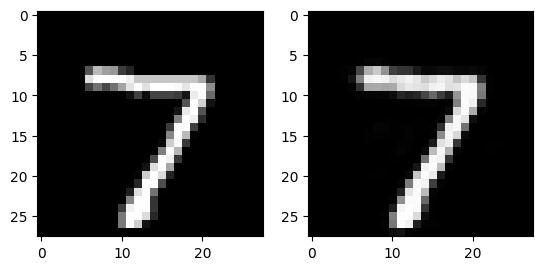

In [ ]:
predict_images = model.predict(test_images)

plt.subplot(1,2,1)
plt.imshow(test_images[0], cmap= plt.get_cmap('gray'))
plt.subplot(1,2,2)
plt.imshow(predict_images[0], cmap = plt.get_cmap('gray'))
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


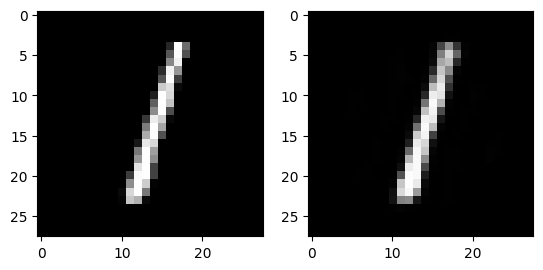

In [7]:
predict_images = model.predict(test_images)

plt.subplot(1,2,1)
plt.imshow(test_images[2], cmap= plt.get_cmap('gray'))
plt.subplot(1,2,2)
plt.imshow(predict_images[2], cmap = plt.get_cmap('gray'))
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


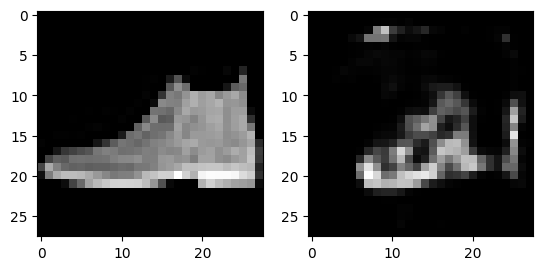

In [8]:
f_mnist = keras.datasets.fashion_mnist
(f_train_images, f_train_labels), (f_test_images, f_test_labels) = f_mnist.load_data()

f_train_images = f_train_images / 255.0
f_test_images = f_test_images / 255.0

f_predict_images = model.predict(f_test_images)
plt.subplot(1,2,1)
plt.imshow(f_test_images[0],cmap = plt.get_cmap('gray'))
plt.subplot(1,2,2)
plt.imshow(f_predict_images[0], cmap = plt.get_cmap('gray'))
plt.show()

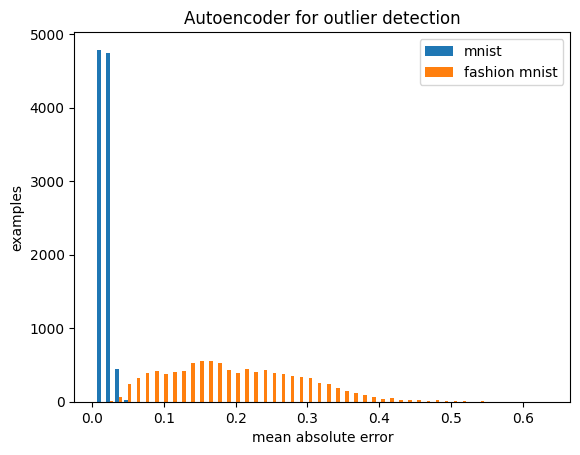

In [10]:
error = np.mean(np.abs(test_images - predict_images), (1,2))
f_error = np.mean(np.abs(f_test_images - f_predict_images), (1,2))
_ = plt.hist((error, f_error), bins = 50, label=['mnist', 'fashion mnist'])

plt.legend()
plt.xlabel('mean absolute error')
plt.ylabel('examples')
plt.title('Autoencoder for outlier detection')
plt.show()

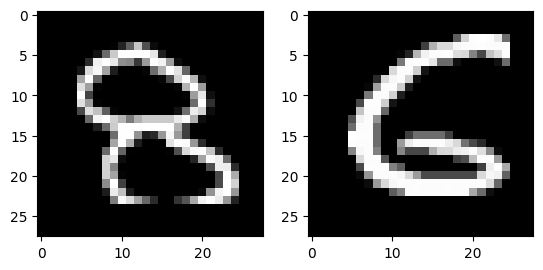

In [11]:
index = error.argmax()
plt.subplot(1,2,1)
plt.imshow(test_images[index], cmap= plt.get_cmap('gray'))
error[index] = 0
index = error.argmax()
plt.subplot(1,2,2)
plt.imshow(test_images[index], cmap=plt.get_cmap('gray'))
plt.show()